In [1]:
from typing import Dict, TypedDict # Dictionary, TypedDictionary
from langgraph.graph import StateGraph # framework that helps you design and manage the flow of tasks (nodes) in your application using graph structure
from pyexpat.errors import messages

##############################################
from IPython.display import Image, display
import tempfile
import os


# we now create an AgentState - shared data structure that keeps track of information as your application run.

class AgentState(TypedDict): # out state schema
    message : str


# define a node in langgraph Now the input typeof a node needs to be the state and the output type also has to be the state,
# because remember the state keeps track of all the information in your application
def greeting_node(state: AgentState) -> AgentState:

    # this is called dock strings. Now dock strings in lang graph is quite important. Why? Because dock strings is what will tell your AI agents when we actually build the AI agents your LLMs what that function actually does what that function's actions are what it performs.
    """ Simple node that adds greeting message to state """
    state['message'] = "Hello " + state['message'] + ", we love you"
    return state
    
   

# let's start to build the graph
# to create a graph in langgraph we should use StateGraph and pass to it the state (state schema)
graph = StateGraph(AgentState)

# adding a node and we should name it so we call it greater and pass its action which is our function that we create early
graph.add_node("greater", greeting_node)


# Graph start point
graph.set_entry_point("greater")

# Graph end point
graph.set_finish_point("greater")

# Compile the graph
app = graph.compile()

result = app.invoke({"message": "USER :D"})
print(result)


c:\Users\abdel\langgraph-video\FreeCodeCamp\HelloWorldAgent\.venv\Lib\site-packages\langchain_core\_api\deprecation.py:26: UserWarning: Core Pydantic V1 functionality isn't compatible with Python 3.14 or greater.
  from pydantic.v1.fields import FieldInfo as FieldInfoV1


{'message': 'Hello USER :D, we love you'}


In [2]:
mermaid = app.get_graph().draw_mermaid()
print(mermaid)
# PASTE THE OUTPUT HERE https://mermaid.live/

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	greater(greater)
	__end__([<p>__end__</p>]):::last
	__start__ --> greater;
	greater --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



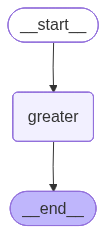

In [3]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png())) 